# Análisis exploratorio de datos básico

## Datos de la competencia HAHA-2021

#### [Julio Waissman Vilanova](julio.waissman@unison.mx)

Abril, 2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
from wordcloud import WordCloud, ImageColorGenerator

plt.style.use('ggplot')
nlp = spacy.load('es_core_news_sm')

# Obtención de datos y visualización de atributos

Los datos vienen ya en un archivo csv

In [3]:
df = pd.read_csv("../data/haha_2021_train.csv")

print(f"Las columnas son: {df.columns}")

df.head(5)

Las columnas son: Index(['id', 'text', 'is_humor', 'votes_no', 'votes_1', 'votes_2', 'votes_3',
       'votes_4', 'votes_5', 'humor_rating', 'humor_mechanism',
       'humor_target'],
      dtype='object')


,id,text,is_humor,votes_no,votes_1,votes_2,votes_3,votes_4,votes_5,humor_rating,humor_mechanism,humor_target
0,tweet1,Niveles de retraso mental: \n\n— Bajo.\n— Medi...,1,1,2,2,0,0,0,1.5,NaN,NaN
1,tweet2,"—Vamos Luke desenfunda tu sable, demuestra tu ...",1,1,3,0,1,0,0,1.5,NaN,NaN
2,tweet3,"- ¿Te ofrezco algo?, ¿Agua, café, mi corazón, ...",1,0,2,1,0,1,1,2.6,NaN,NaN
3,tweet4,No se porqué me hago la cabeza deooos,0,3,0,0,0,0,0,NaN,NaN,NaN
4,tweet5,Quisiera saber que hago durante la siesta de l...,0,4,0,1,0,0,0,NaN,NaN,NaN


En `text`se encuentran los documentos a ser procesados

In [7]:
print(80 * '=')
for texto in df.text.sample(10).values:
    print(texto)
    print(80 * '=')

Falta poquito para que la renovación de los ositos. ( !!! )
A veces no se puede explicar lo que vemos en una persona, simplemente es que esa persona te hace sentir todo y nadie mas lo puede hacer.
Una vez un exorcista le quitó los diablitos a mi bicicleta.
La neta, tú eras el motivo por el cual me gustaba ir al colegio
EL AÑO ACABA Y aún no me quieres, no mames
Escuchar tu canción favorita en la radio y automáticamente sacar el artista que llevas dentro.
Todos mis amigos hablandome LOS AMO
—Eres un maldito tacaño, terminamos, mira acá está tú anillo. —Oye, pero... ¿Y la cajita?
Si necesitas a alguien para ser feliz,para sentirte complet@,para respirar,ect...q mal te va uno se ama Primero Luego a los demas!!
Estoy viendo""Inception"" y la misma me esta "friendo" el cerebro( dado ciertas ideas y bases sobre la mente y el mundo d los sueños q tengo


De los cuales la mayoría no están considerados como de humor

In [9]:
is_humor = Counter(df.is_humor.values)

print("Cuantos textos son de humor voluntario y cuantos no")
print(is_humor)

# Podemos ver si hay datos perdidos en humor_mechanism y humor_target
# para los casos donde es de humor y donde no es de humor

print("\n\nAqui vemos que de los textos que no son de humor, todos los valores de mecanismo y target son NaN")
print(f"Para mecanismo = {Counter(df.humor_mechanism[df.is_humor == 0])}")
print(f"Para target = {Counter(df.humor_target[df.is_humor == 0])}")
print(f"Para rating (aplicando all) = {np.all(pd.isna(df.humor_rating[df.is_humor == 0].values))}")

Cuantos textos son de humor voluntario y cuantos no
Counter({0: 14747, 1: 9253})


Aqui vemos que de los textos que no son de humor, todos los valores de mecanismo y target son NaN
Para mecanismo = Counter({nan: 14747})
Para target = Counter({nan: 14747})
Para rating (aplicando all) = True


In [10]:
print("\nOcurrencias y valores de mecanismos")
mec_dic = dict(Counter(df.humor_mechanism[df.is_humor > 0]))
df_mec = pd.DataFrame({
    "Mecanismo": [mec if pd.notna(mec) else pd.NA for mec in mec_dic.keys()],
    "Ocurrencias": mec_dic.values()
})
print(df_mec)


Ocurrencias y valores de mecanismos
           Mecanismo  Ocurrencias
0               <NA>         4453
1          reference          578
2            analogy          319
3              irony          371
4            insults          146
5             absurd          566
6             parody          255
7      embarrassment          301
8          unmasking          441
9   misunderstanding          416
10          wordplay          701
11        stereotype          230
12      exaggeration          476


In [13]:
print(df.humor_target.unique())

[nan 'substance use' 'health' 'age' 'body shaming; women' 'professions'
 'self-deprecating' 'religion' 'family/relationships' 'men' 'women'
 'body shaming' 'ethnicity/origin' 'sexual aggressors' 'social status'
 'age; self-deprecating' 'self-deprecating; social status'
 'professions; self-deprecating' 'professions; women'
 'social status; technology' 'technology' 'lgbt'
 'body shaming; self-deprecating' 'age; women' 'men; women'
 'family/relationships; substance use' 'self-deprecating; substance use'
 'age; body shaming' 'professions; religion' 'men; social status'
 'technology; women' 'body shaming; men' 'religion; women'
 'health; self-deprecating' 'men; substance use'
 'family/relationships; women' 'body shaming; professions'
 'lgbt; professions' 'body shaming; lgbt' 'professions; social status'
 'age; family/relationships' 'age; body shaming; women'
 'health; professions' 'men; self-deprecating'
 'ethnicity/origin; professions' 'ethnicity/origin; women'
 'ethnicity/origin; substanc

In [14]:
print("\nOcurrencias y valores de target (tomando repetciones)")

target_names = set([])
target_dict = {}
for line in df.humor_target[df.is_humor > 0].unique():
    if pd.notna(line):
        for valor in line.split(';'):
            valor = valor.strip()
            target_names.add(valor)
            target_dict[valor] = target_dict.get(valor, 0) + 1 
    else:
        target_names.add("NA")

target_count = {name: 0 for name in target_names}
for line in df.humor_target[df.is_humor > 0]:
    if pd.isna(line):
        target_count['NA'] += 1
    else:
        for name in target_count:
            if line.find(name):
                target_count[name] += 1
df_tar = pd.DataFrame({
    "target": target_count.keys(),
    "count": target_count.values(),
    "repetido": [1 if key == "NA" else target_dict[key] for key in target_count.keys()]
}).sort_values("count", ascending=False).reset_index(drop=True)

print(df_tar)


Ocurrencias y valores de target (tomando repetciones)
                  target  count  repetido
0                     NA   9253         1
1      sexual aggressors   1616         1
2                   lgbt   1590         3
3               religion   1588         4
4          social status   1583         7
5             technology   1579         3
6                 health   1572         5
7       ethnicity/origin   1562         6
8          substance use   1554         6
9                    men   1539         6
10                   age   1524         7
11  family/relationships   1453         6
12          body shaming   1450        11
13      self-deprecating   1437         8
14                 women   1386        11
15           professions   1373        10


y el *grado de chistozes* evaluado por 5 jurados tiene la siguiente distribución:

¿Existe algun valor perdido? False


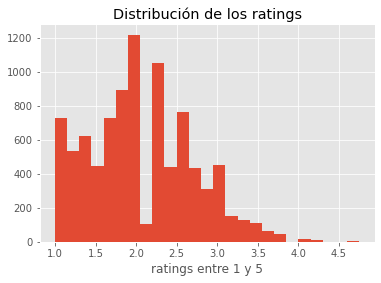

In [15]:
print(f"¿Existe algun valor perdido? {np.any(pd.isna(df.humor_rating[df.is_humor > 0]))}")

plt.hist(df.humor_rating[df.is_humor>0].values, bins=25)
plt.xlabel("ratings entre 1 y 5")
plt.title("Distribución de los ratings")
plt.show()

# Algunas nubes de palabras para divertirse

Primero vamos a agregar una columna con el texto tratado con *SpaCy*

In [16]:
df['spacy'] = [nlp(text) for text in df.text]

In [29]:
spacy.displacy.render(df.spacy.sample(2))

In [31]:
spacy.displacy.render(df.spacy.sample(5), style='ent')

Ahora vamos a hacer algunas nubes de palabras

In [35]:
def genera_nube(docs, pos_tags = [], tipo=None):

    newText = ""
    for doc in docs:
        for token in doc:
            if not any(
                [token.is_stop, token.is_currency,
                 token.is_punct, token.is_bracket, token.is_quote,
                 token.like_num, token.like_email, token.like_url]):           
                if not pos_tags or token.pos_ in pos_tags:
                    texto = token.lemma_ if tipo == "lema" else token.lower_
                    newText = " ".join((newText, texto))
    return WordCloud().generate(newText)

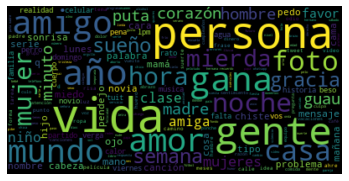

In [45]:
wordcloud = genera_nube(
    df.spacy[df.is_humor == 0], 
    pos_tags = ['NOUN'], 
    tipo="-lema"
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

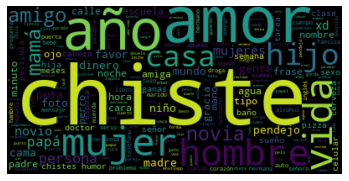

In [44]:
wordcloud = genera_nube(
    df.spacy[df.is_humor > 0], 
    pos_tags = ['NOUN'], 
    tipo="-lema"
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

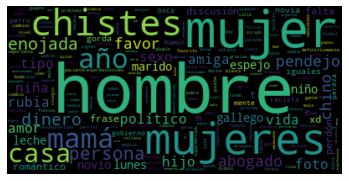

In [50]:
wordcloud = genera_nube(
    df.spacy[df.humor_mechanism == 'stereotype'], 
    pos_tags = ['ADJ', 'ADV', 'NOUN'], 
    tipo='-lema'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

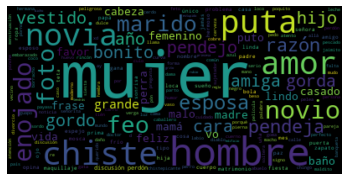

In [51]:
df_temp = df[pd.notna(df.humor_target)]

wordcloud = genera_nube(
    df_temp.spacy[df_temp.humor_target.str.contains("women")] , 
    pos_tags = ['ADJ', 'ADV', 'NOUN'], 
    tipo='lema'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tareas a desarrollar

Al parecer tenemos 3 tareas a desarrollar para ir integrandolas en un pipeline de *SpaCy*:

1. Categorizar todos los textos entre humor y no humor (clasificación binaria)
2. Clasificar los textos en mecanismo (textcat con una sola clase por texto, no binaria)
3. Clasificar los textos por objetivo (textcat con multiples clases por texto)
4. Predecir el *indice de chistosez* (regresión a partir de un texto)


Todas las podemos desarrollar en *Spacy* usando los proyectos. Hay que verificar si se hace un proyecto por tarea o si podemos agregar todas las tareas en el mismo proyecto. 

El único caso que no se si se pueda hacer con *Spacy* es el de regresión. Por otro lado, con lo visto en redes neuronales, tambien podemos aplicarlo a estos problemas.